In [1]:
import pandas as pd
from numpy import isnan
import seaborn as sns

sns.set(rc = {'figure.figsize':(20,10)})

In [2]:
grupos = pd.read_csv("grupos.csv", encoding = "ISO-8859-1")
leaderboard = pd.read_csv("nlp-getting-started-publicleaderboard.csv")
leaderboard = leaderboard[ leaderboard['SubmissionDate'].gt('2020-06') ]

In [3]:
def seParecen(g,l,threshold):
    
    l = str(l)
    g = str(g)
    
    if len(g) > len(l):
        smaller = l
        larger = g
    else:
        smaller = g
        larger = l
        
    count = 0
    for i in range(len(smaller)):
        if g[i] == l[i]:
            count += 1
    
    return count/len(larger) >= threshold or smaller in larger

In [4]:
g_id = { g:i for i,g in enumerate(grupos['Nombre'].values)}
l_id = { l:i for i,l in enumerate(leaderboard['TeamName'].values)}

parecidos = {}
asignados = {}
for g in list(grupos['Nombre'].values):
    for l in list(leaderboard['TeamName'].values):
        
        if not (type(g) == type('') and type(l) == type('')):
            continue
            
        if seParecen(g,l,0.7):
            if not l in asignados:
                asignados[l] = g
                parecidos[g] = l
            
fuera = []
for g in g_id:
    if not g in parecidos:
        fuera.append(g)
        
for g in fuera:
    for l in list(leaderboard['TeamName'].values):
        
        if not (type(g) == type('') and type(l) == type('')):
            continue
            
        if seParecen(g,l,0.5):
            if not l in asignados:
                asignados[l] = g
                parecidos[g] = l
            
fuera = []
for g in g_id:
    if not g in parecidos:
        fuera.append(g)

In [5]:
cross = leaderboard[leaderboard['TeamName'].isin(list(parecidos.values()))]

In [25]:
datos_leaderboard = cross.groupby('TeamName')['SubmissionDate'].max().to_frame().merge(cross, on = 'SubmissionDate')\
    .sort_values('Score', ascending = False).reset_index()[['TeamName','Score']]

datus_score = datos_leaderboard[datos_leaderboard['TeamName'] == 'DatUs']['Score'].values[0]

datos_leaderboard['relative'] = (datos_leaderboard['Score'] - datus_score) * 100

datos_leaderboard

,TeamName,Score,relative
0,COVIgData-19,0.83113,3.126
1,Grupo python fiuba,0.81703,1.716
2,DataSOS,0.81274,1.287
3,El tio del marido de Pampita,0.81274,1.287
4,Superficial Intelligence,0.81244,1.257
5,Grupo Orga Datos,0.81060,1.073
6,Grupo 13,0.80999,1.012
7,Corona2,0.80845,0.858
8,Grupo Rosa,0.80447,0.460
9,Kung Fu Panda,0.80140,0.153


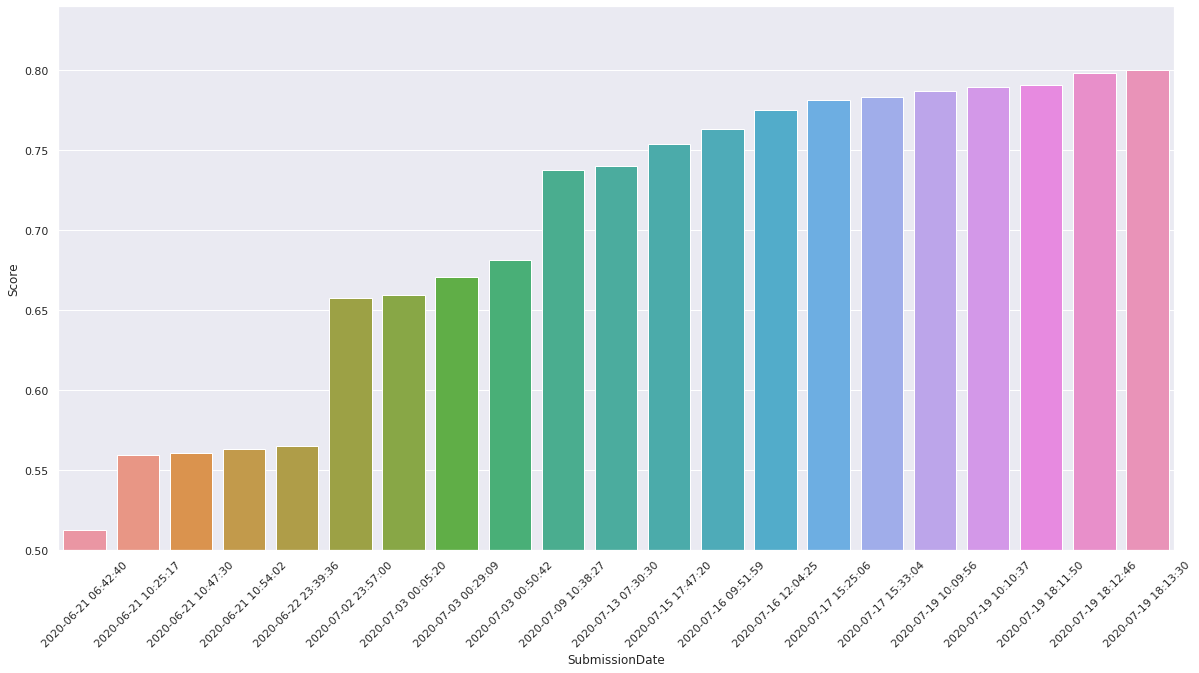

In [7]:
v = sns.barplot(x = 'SubmissionDate', y = 'Score', data = leaderboard[ leaderboard['TeamName'] == 'DatUs' ])
v.set(ylim=(0.5, None))
for item in v.get_xticklabels():
        item.set_rotation(45)

In [8]:
cross.groupby('TeamName')['SubmissionDate'].count().sort_values(ascending = False)

TeamName
DatUs                           21
The Datalorian                  10
El Cuarteto del Code             9
Superficial Intelligence         9
Unidos por los datos             8
COVIgData-19                     7
Corona2                          7
Grupo 13                         7
Grupo 1 - King Data              7
Barbijo de Uranio                6
El tio del marido de Pampita     6
DataSOS                          5
El Cuarteto Imperial             4
Alpha Zero                       4
Grupo 33 - DataTravellers        4
Grupo Orga Datos                 4
Grupo Rosa                       4
Grupo python fiuba               4
Pyrañas                          4
Datavid20                        2
Kung Fu Panda                    2
Equipo Cloud                     2
Datastic                         1
Name: SubmissionDate, dtype: int64

In [9]:
fuera

['How i met your data',
 'Coronapandas',
 'Les chiques super poderoses',
 'CuarenData 2.0',
 'DATAVID-20',
 'Grupo con barbijo',
 'undefined',
 'ChocoTeam',
 nan,
 'covidatos',
 'CoronaDatos',
 'Data hunters',
 'DTS: DaTa Science',
 'Rest Driven Development',
 'Here we go again',
 'Undefined',
 'Los últimos',
 'Team_Undav',
 'DelLejanoOeste',
 'Grupo - AVV',
 'El Jabalí Salvaje',
 'Oyentes en cuarentena 2020.',
 'Los Oyentes 700',
 'Oh La La, Data',
 'Belu +3',
 'Grupo Random',
 'DATA',
 'El gato de Turing',
 'ECONOSDATA',
 'marte',
 'Los aprendices de Oogway',
 'GMC',
 'Zumba',
 'Datos al alcance',
 'Reykjavik',
 'Reinventadas',
 '3Sigma',
 'Grupo Rocket Cósmico',
 'NameError',
 'Daiana']

In [10]:
len(fuera)

40